In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
gnb = GaussianNB()
X, Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=4)

In [3]:
gnb.fit(X, Y)
ypred = gnb.predict(X)
print("Accuracy : ", np.sum(ypred==Y)/X.shape[0])

Accuracy :  0.9


### Confusion Matrix

In [4]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """ This Function Prints and Plots The Confusion Matrix .
    Normalization Can Be Applied By Setting 'normalize=True' """
    
    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1))[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix (Without Normalisation)")
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

### Generate Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
cnf_matrix = confusion_matrix(Y, ypred)
print(cnf_matrix)

[[87 11]
 [ 9 93]]


### Visualise Confusion Matrix

Confusion Matrix (Without Normalisation)


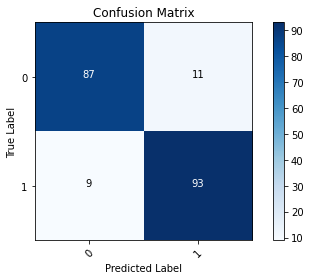

In [7]:
plot_confusion_matrix(cnf_matrix, [0,1], normalize=False, title="Confusion Matrix")